In [84]:
#Author: Tarteel Alkaraan (25847208)
#Last Updated: 11th November 2024
#References: Updated Code From Module Workshops 1 To 5
#Import Libraries
import pywt
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.signal.windows import hann
from scipy.signal import stft, cwt, morlet
from scipy.fft import rfft, rfftfreq, irfft

In [85]:
#Sampling Frequency
Fs = 44100

#Sampling Period
dt = 1/Fs

#Signals Length In Seconds
L = 6

#Time Vector
t = np.arange(0, L, dt)

#Signals Amplitude
A = 6000

#Signals Frequency
ω = 22050

In [86]:
#Creating Signal S
S1 = A * np.sin(2 * np.pi * ω * t)
S2 = 30000 * np.sin(2 * np.pi * ω * t)
S3 = 20000 * np.sin(2 * np.pi * ω * t)
S4 = 10000 * np.sin(2 * np.pi * ω * t)
S5 = 20000 * np.sin(2 * np.pi * ω * t)

S = S1 + S2 + S3 + S4 + S5

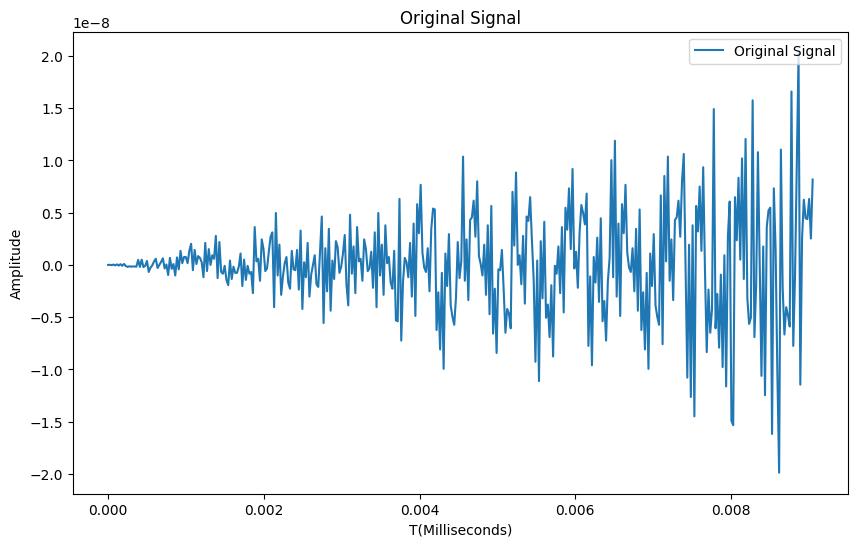

In [87]:
#Plotting Signal In Time Domain
plt.figure(figsize = (10, 6))
plt.plot(t[:400], S[:400], label = 'Original Signal')
plt.title('Original Signal')
plt.xlabel('T(Milliseconds)')
plt.ylabel('Amplitude')
plt.legend(fontsize = 10, loc = 'upper right')
plt.show()

In [88]:
#Computing Fast Fourier Transform (FFT) And Real-Valued FFT (RFFT) Of Signal S
Y = rfft(S) 

#Calculating Power Spectrum (PSD)
PSD = np.abs(Y)
freqs = rfftfreq(t.size, 1/Fs)

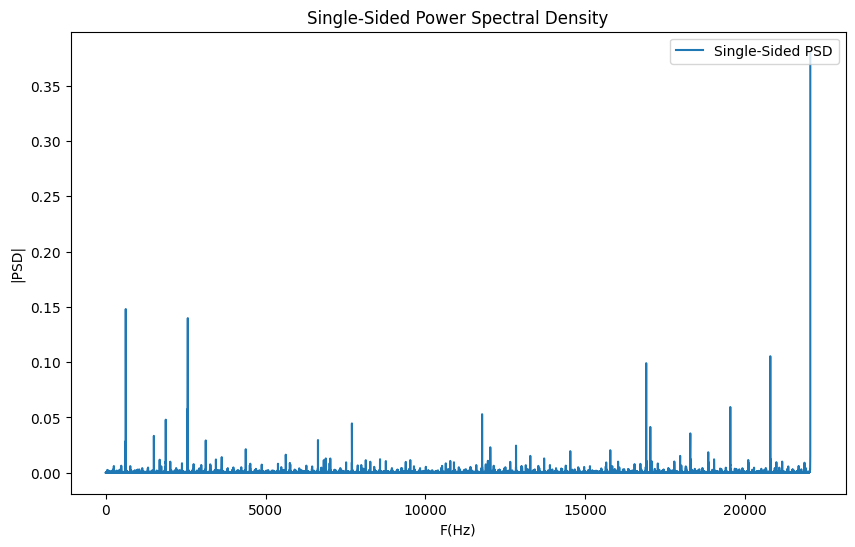

In [89]:
#Plotting Single-Sided Power Spectral Density
plt.figure(figsize = (10, 6))
plt.plot(freqs, PSD, label = 'Single-Sided PSD')
plt.title('Single-Sided Power Spectral Density')
plt.xlabel('F(Hz)')
plt.ylabel('|PSD|')
plt.legend(fontsize = 10, loc = 'upper right')
plt.show()

In [90]:
#Assigning Threshold Value
threshold = 0.20

In [91]:
#Finding Freqs With Large PSD
#Taking Out Small Fourier Coeffs In Y
indices = PSD > threshold
Y_zeroed = indices * Y

In [92]:
#Assigning Filtered FFT (FFILT) Value
#Inverseing FFT For Filtered Time Signal
ffilt = irfft(Y_zeroed)

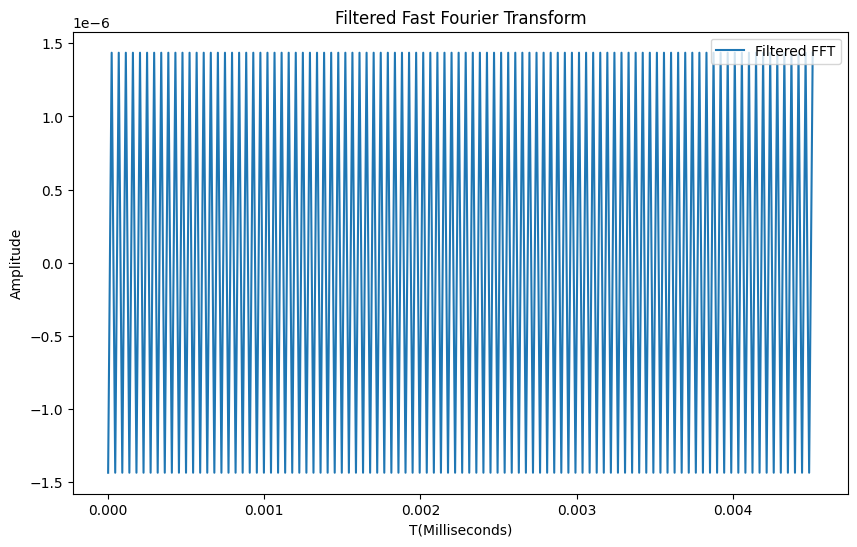

In [93]:
#Plotting First 200 FFILT Data Points
plt.figure(figsize = (10, 6))
plt.plot(t[:200], ffilt[:200], label = 'Filtered FFT')
plt.title('Filtered Fast Fourier Transform')
plt.xlabel('T(Milliseconds)')
plt.ylabel('Amplitude')
plt.legend(fontsize = 10, loc = 'upper right')
plt.show()

In [94]:
#Defining Size Of Average Filter Kernel
kernel_size = 15

In [95]:
#Creating Average Filter Kernel
average_kernel = np.ones(kernel_size) / 15

In [96]:
#Convolving Signal With Average Filter Kernel
S_filtered = np.convolve(average_kernel, S, mode = 'same')

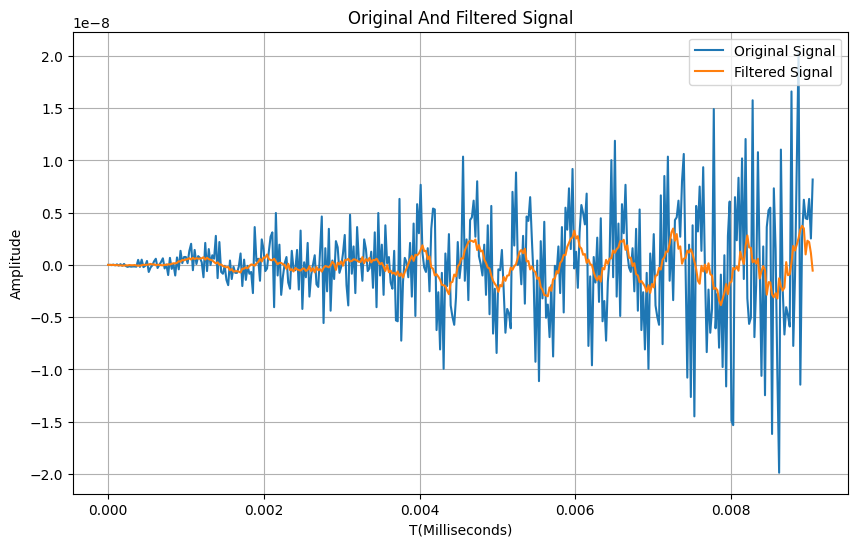

In [97]:
#Plotting First 400 Points Of Original And Filtered Signal
plt.figure(figsize = (10, 6))
plt.plot(t[:400], S[:400], label = 'Original Signal')
plt.plot(t[:400], S_filtered[:400], 'tab:orange', label = 'Filtered Signal')
plt.title('Original And Filtered Signal')
plt.xlabel('T(Milliseconds)')
plt.ylabel('Amplitude')
plt.legend(fontsize = 10, loc = 'upper right')
plt.grid()
plt.show()

In [98]:
#Defining Parameters Of Gaussian Filter
#Standard Deviation (SD) Of Gaussian Distribution
sigma = 1.0

#Filter Size
filter_size = 9

In [99]:
#Creating Array Representing Normal Gaussian Kernel
z = np.linspace(-filter_size // 2, filter_size // 2, filter_size)
gaussian_kernel = np.exp(-z ** 2 / (2 * sigma ** 2))
norm_gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)  

In [100]:
#Convolving Signal With Normal Gaussian Kernel
S_smoothed = np.convolve(norm_gaussian_kernel, S, mode = 'same')

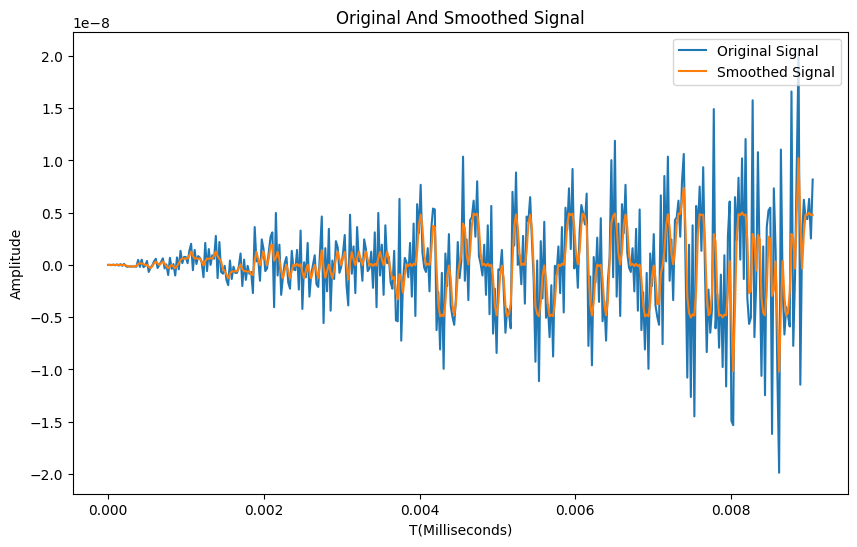

In [101]:
#Plotting First 400 Points Of Original And Smoothed Signal
plt.figure(figsize = (10, 6))
plt.plot(t[:400], S[:400], label = 'Original Signal')
plt.plot(t[:400], S_smoothed[:400], 'tab:orange', label = 'Smoothed Signal')
plt.title('Original And Smoothed Signal')
plt.xlabel('T(Milliseconds)')
plt.ylabel('Amplitude')
plt.legend(fontsize = 10, loc = 'upper right')
plt.show()

In [102]:
#Length Of Window
M = 128

#Window
g = hann(M, sym = False)

#Overlap Of Window
L = 0.75 * M

#Length Of FFT
Ndft = 128

In [103]:
#Using Spectrogram With Explicit Parameters
fx, tx, sx = spectrogram(S, fs = Fs, window = g, nperseg = M, noverlap = int(L), nfft = Ndft, scaling = 'spectrum')

In [104]:
#Using STFT With Explicit Parameters
ft, tt, st = stft(S, fs = Fs, window = g, noverlap = int(L), nperseg = M, nfft = Ndft, boundary = None, padded = False, scaling = 'spectrum')

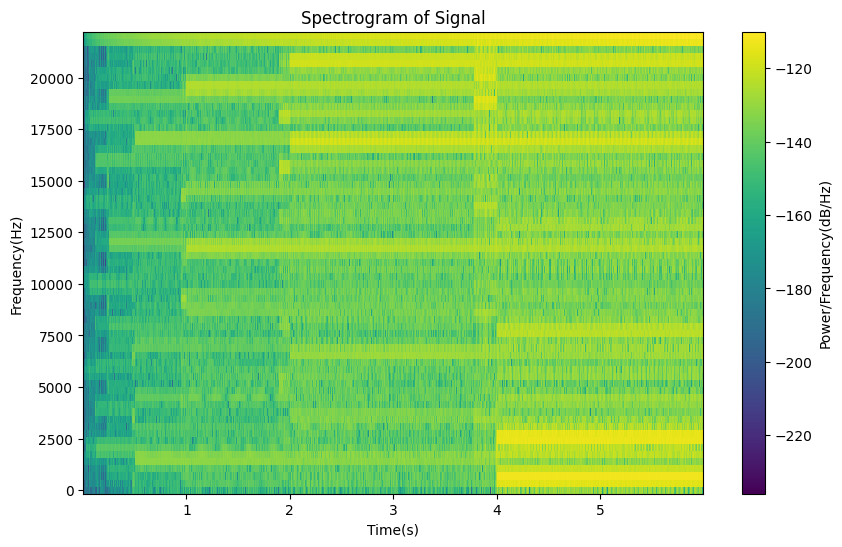

In [105]:
#Plotting Spectrogram
plt.figure(figsize = (10, 6))
#Converting To dB
plt.pcolormesh(tx, fx, 10 * np.log10(np.abs(sx)), shading = 'auto')
plt.title('Spectrogram of Signal')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.colorbar(label = 'Power/Frequency(dB/Hz)')
plt.show()

/var/folders/kq/b4w9ld0j48v_0_vkr1pncnym0000gn/T/ipykernel_14048/4092124073.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(tt, ft, 10 * np.log10(np.abs(st)), shading = 'auto')


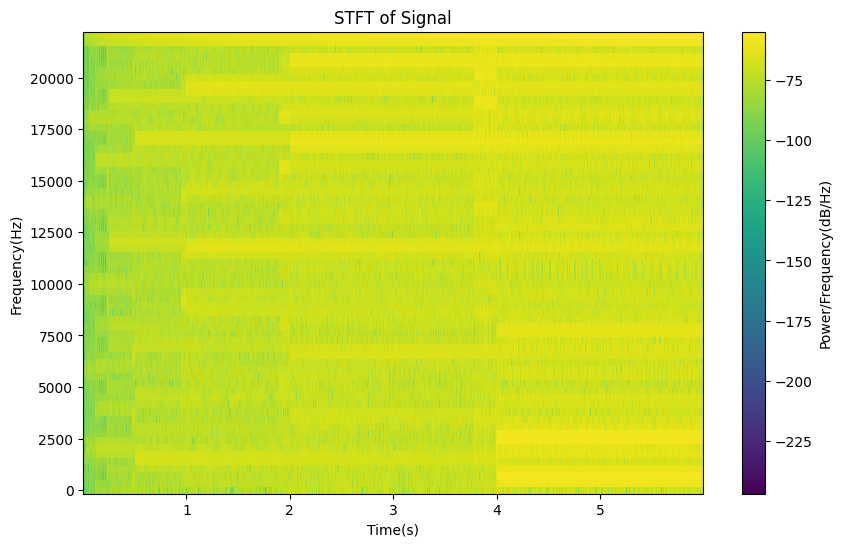

In [106]:
#Plotting STFT
plt.figure(figsize = (10, 6))
#Converting To dB
plt.pcolormesh(tt, ft, 10 * np.log10(np.abs(st)), shading = 'auto')
plt.title('STFT of Signal')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.colorbar(label = 'Power/Frequency(dB/Hz)')
plt.show()

In [107]:
#Performing Continuous Wavelet Transform (CWT)
wavelet = 'morl'
scales = np.arange(1, 128)
cwt_results, frequencies = pywt.cwt(S, scales, wavelet)

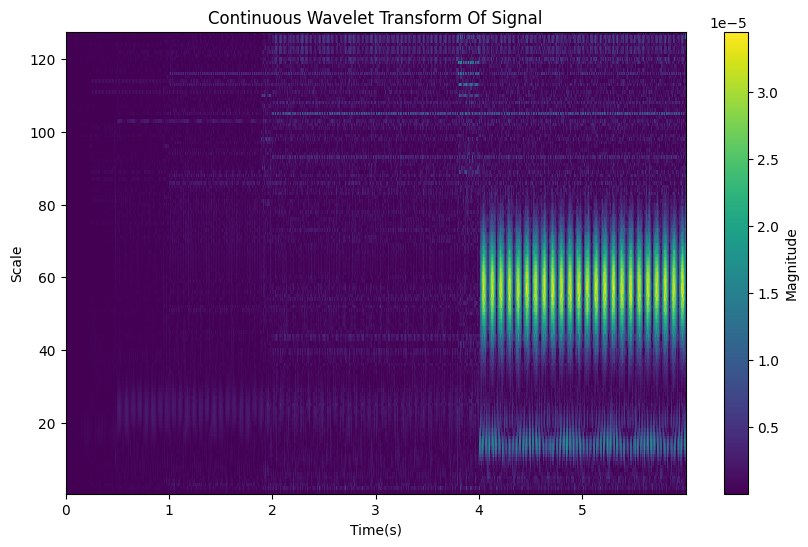

In [108]:
#Plotting CWT Results
plt.figure(figsize = (10, 6))
plt.pcolormesh(t, scales, np.abs(cwt_results), shading = 'auto')
plt.title('Continuous Wavelet Transform Of Signal')
plt.xlabel('Time(s)')
plt.ylabel('Scale')
plt.colorbar(label = 'Magnitude')
plt.show()